In [22]:
import pandas as pd
import re

# ====== YEAR SELECTOR ======
YEAR = 2024

# ====== File paths for that year ======
proj_file = fr"C:\Users\damen\Desktop\football-main\Projections\projections_{YEAR}_wk0.csv"

act_qb_file = fr"C:\Users\damen\Desktop\football-main\Actuals\QB Stats\{YEAR} QB Stats"
act_rb_file = fr"C:\Users\damen\Desktop\football-main\Actuals\RB Stats\{YEAR} RB Stats"
act_wr_file = fr"C:\Users\damen\Desktop\football-main\Actuals\WR Stats\{YEAR} WR Stats"
act_te_file = fr"C:\Users\damen\Desktop\football-main\Actuals\TE Stats\{YEAR} TE Stats"

# ====== Load projections ======
df_proj = pd.read_csv(proj_file)

In [23]:
print(df_proj.shape)
print(df_proj.columns.tolist())
df_proj.head()

(216, 20)
['Unnamed: 0', 'player', 'position', 'team', 'points', 'sd_pts', 'dropoff', 'floor', 'ceiling', 'points_vor', 'floor_vor', 'ceiling_vor', 'rank', 'floor_rank', 'ceiling_rank', 'position_rank', 'tier', 'adp', 'aav', 'uncertainty']


,Unnamed: 0,player,position,team,points,sd_pts,dropoff,floor,ceiling,points_vor,floor_vor,ceiling_vor,rank,floor_rank,ceiling_rank,position_rank,tier,adp,aav,uncertainty
0,1,Christian McCaffrey,RB,SF,353.0,19.0,43.30,332.0,380.0,176.0,171.0,175.0,1,1,1,1,1,1.36,69.7,1.0
1,2,Breece Hall,RB,NYJ,310.0,29.3,6.12,280.0,350.0,133.0,119.0,145.0,2,2,3,2,1,4.98,57.2,49.0
2,3,CeeDee Lamb,WR,DAL,347.0,27.4,13.10,322.0,391.0,127.0,115.0,147.0,3,3,2,1,1,3.88,59.8,23.0
3,4,Bijan Robinson,RB,ATL,304.0,26.9,27.90,271.0,336.0,126.0,110.0,131.0,4,4,5,3,2,5.19,59.0,37.0
4,5,Josh Allen,QB,BUF,412.0,32.3,11.10,367.0,454.0,123.0,106.0,136.0,5,6,4,1,1,25.20,31.2,23.0


In [24]:
# Use read_table because actuals don't have .csv extensions
df_qb = pd.read_table(act_qb_file, sep=None, engine="python")
print("QB shape:", df_qb.shape)
df_qb.head()

QB shape: (139, 18)


,Rank,Player,CMP,ATT,PCT,YDS,Y/A,TD,INT,SACKS,ATT.1,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1,Lamar Jackson (BAL),316,474,66.7,"4,172",8.8,41,4,23,139,915,4,5,17,434.4,25.6,99.5%
1,2,Josh Allen (BUF),307,483,63.6,"3,731",7.7,28,6,14,102,531,12,2,17,385.1,22.7,99.7%
2,3,Joe Burrow (CIN),460,652,70.6,"4,918",7.5,43,9,48,42,201,2,5,17,381.9,22.5,99.1%
3,4,Baker Mayfield (TB),407,570,71.4,"4,500",7.9,41,16,40,60,378,3,2,17,381.8,22.5,94.9%
4,5,Jayden Daniels (WAS),331,480,69.0,"3,568",7.4,25,9,47,148,891,6,0,17,364.7,21.5,99.5%


In [25]:
df_rb = pd.read_table(act_rb_file, sep=None, engine="python")
print("RB shape:", df_rb.shape)
df_rb.head()

RB shape: (260, 18)


,Rank,Player,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1,Jahmyr Gibbs (DET),250,"1,412",5.6,70,13,16,52,63,517,9.9,4,1,17,362.9,21.3,99.6%
1,2,Saquon Barkley (PHI),345,"2,005",5.8,72,17,13,33,43,278,8.4,2,1,16,355.3,22.2,99.5%
2,3,Bijan Robinson (ATL),304,"1,456",4.8,37,5,14,61,72,431,7.1,1,0,17,341.7,20.1,99.4%
3,4,Derrick Henry (BAL),325,"1,921",5.9,87,19,16,19,22,193,10.2,2,1,17,336.4,19.8,99.4%
4,5,De'Von Achane (MIA),203,907,4.5,61,5,6,78,87,592,7.6,6,0,17,299.9,17.6,99.1%


In [26]:
df_wr = pd.read_table(act_wr_file, sep=None, engine="python")
print("WR shape:", df_wr.shape)
df_wr.head()

WR shape: (450, 17)


,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1,Ja'Marr Chase (CIN),127,175,"1,708",13.4,70,19,17,3,32,0,0,17,403.0,23.7,99.6%
1,2,Justin Jefferson (MIN),103,154,"1,533",14.9,97,28,10,1,3,0,0,17,317.5,18.7,99.5%
2,3,Amon-Ra St. Brown (DET),115,141,"1,263",11.0,66,14,12,2,6,0,1,17,316.2,18.6,99.6%
3,4,Brian Thomas Jr. (JAC),87,133,"1,282",14.7,85,18,10,6,48,0,0,17,284.0,16.7,99.3%
4,5,Drake London (ATL),100,158,"1,271",12.7,39,12,9,1,-3,0,0,17,280.8,16.5,99.0%


In [27]:
df_te = pd.read_table(act_te_file, sep=None, engine="python")
print("TE shape:", df_te.shape)
df_te.head()

TE shape: (247, 17)


,Rank,Player,REC,TGT,YDS,Y/R,LG,20+,TD,ATT,YDS.1,TD.1,FL,G,FPTS,FPTS/G,ROST
0,1,Brock Bowers (LV),112,153,"1,194",10.7,57,15,5,5,13,0,0,17,262.7,15.5,99.5%
1,2,Trey McBride (ARI),111,147,"1,146",10.3,37,10,2,1,2,1,0,16,249.8,15.6,99.2%
2,3,George Kittle (SF),78,94,"1,106",14.2,43,21,8,0,0,0,0,15,236.6,15.8,99.2%
3,4,Jonnu Smith (PIT),88,111,884,10.0,57,4,8,2,-1,0,1,17,222.3,13.1,62.0%
4,5,Travis Kelce (KC),97,133,823,8.5,38,9,3,1,1,0,1,16,195.4,12.2,96.2%


In [28]:
# Copy QB df
act_qb = df_qb.copy()

# Clean names: strip "(TEAM)"
act_qb['player'] = act_qb['Player'].str.replace(r"\s*\(.*\)$", "", regex=True).str.strip()

# Subset to what is needed
act_qb_small = act_qb[['player','FPTS']]
proj_small = df_proj[['player','points']].copy()

# Merge
merged_qb = act_qb_small.merge(proj_small, on='player', how='inner')

# Error calculations
merged_qb['error'] = merged_qb['points'] - merged_qb['FPTS']
merged_qb['abs_error'] = merged_qb['error'].abs()

print(merged_qb.shape)
merged_qb.head(10)

(32, 5)


,player,FPTS,points,error,abs_error
0,Lamar Jackson,434.4,376.0,-58.4,58.4
1,Josh Allen,385.1,412.0,26.9,26.9
2,Joe Burrow,381.9,365.0,-16.9,16.9
3,Baker Mayfield,381.8,308.0,-73.8,73.8
4,Jayden Daniels,364.7,320.0,-44.7,44.7
5,Jared Goff,336.5,332.0,-4.5,4.5
6,Bo Nix,329.1,252.0,-77.1,77.1
7,Jalen Hurts,320.0,401.0,81.0,81.0
8,Sam Darnold,319.8,261.0,-58.8,58.8
9,Kyler Murray,308.4,342.0,33.6,33.6


In [29]:
# --- RB ---
act_rb = df_rb.copy()
act_rb['player'] = act_rb['Player'].str.replace(r"\s*\(.*\)$", "", regex=True).str.strip()
act_rb_small = act_rb[['player','FPTS']]
merged_rb = act_rb_small.merge(proj_small, on='player', how='inner')
merged_rb['error'] = merged_rb['points'] - merged_rb['FPTS']
merged_rb['abs_error'] = merged_rb['error'].abs()
print("RB matches:", merged_rb.shape)
print(merged_rb.head(10))


# --- WR ---
act_wr = df_wr.copy()
act_wr['player'] = act_wr['Player'].str.replace(r"\s*\(.*\)$", "", regex=True).str.strip()
act_wr_small = act_wr[['player','FPTS']]
merged_wr = act_wr_small.merge(proj_small, on='player', how='inner')
merged_wr['error'] = merged_wr['points'] - merged_wr['FPTS']
merged_wr['abs_error'] = merged_wr['error'].abs()
print("WR matches:", merged_wr.shape)
print(merged_wr.head(10))


# --- TE ---
act_te = df_te.copy()
act_te['player'] = act_te['Player'].str.replace(r"\s*\(.*\)$", "", regex=True).str.strip()
act_te_small = act_te[['player','FPTS']]
merged_te = act_te_small.merge(proj_small, on='player', how='inner')
merged_te['error'] = merged_te['points'] - merged_te['FPTS']
merged_te['abs_error'] = merged_te['error'].abs()
print("TE matches:", merged_te.shape)
print(merged_te.head(10))

RB matches: (65, 5)
           player   FPTS  points  error  abs_error
0    Jahmyr Gibbs  362.9   264.0  -98.9       98.9
1  Saquon Barkley  355.3   276.0  -79.3       79.3
2  Bijan Robinson  341.7   304.0  -37.7       37.7
3   Derrick Henry  336.4   230.0 -106.4      106.4
4     Josh Jacobs  293.1   242.0  -51.1       51.1
5  Kyren Williams  272.1   253.0  -19.1       19.1
6      James Cook  266.7   234.0  -32.7       32.7
7    Alvin Kamara  265.3   241.0  -24.3       24.3
8     Chase Brown  255.0   159.0  -96.0       96.0
9    James Conner  253.8   200.0  -53.8       53.8
WR matches: (64, 5)
               player   FPTS  points  error  abs_error
0       Ja'Marr Chase  403.0   307.0  -96.0       96.0
1    Justin Jefferson  317.5   308.0   -9.5        9.5
2   Amon-Ra St. Brown  316.2   313.0   -3.2        3.2
3    Brian Thomas Jr.  284.0   173.0 -111.0      111.0
4        Drake London  280.8   245.0  -35.8       35.8
5        Malik Nabers  273.6   226.0  -47.6       47.6
6      Terry M

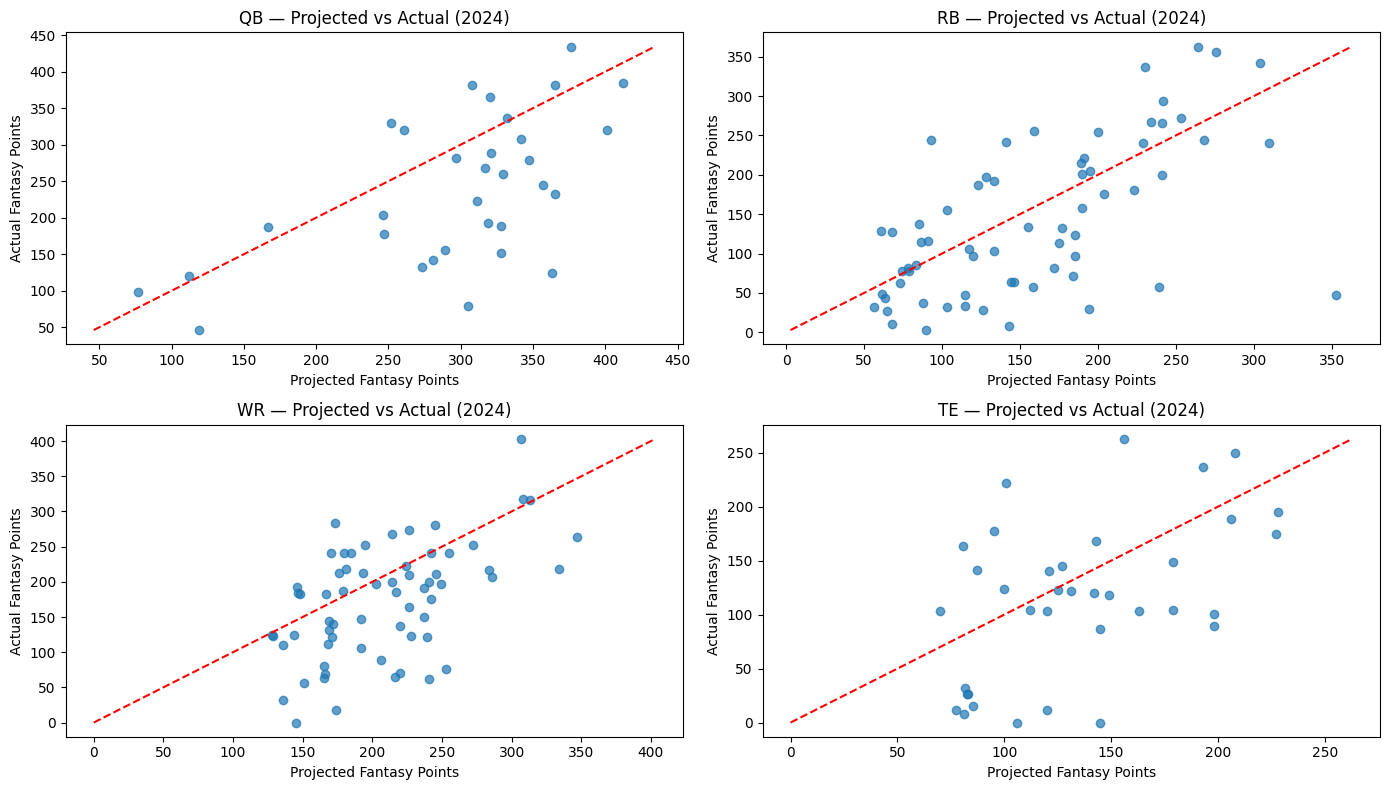

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14,8))

# Helper for plotting
def plot_proj_vs_actual(ax, df, pos_label):
    ax.scatter(df['points'], df['FPTS'], alpha=0.7)
    
    # Add diagonal line
    min_val = min(df['points'].min(), df['FPTS'].min())
    max_val = max(df['points'].max(), df['FPTS'].max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    ax.set_xlabel("Projected Fantasy Points")
    ax.set_ylabel("Actual Fantasy Points")
    ax.set_title(f"{pos_label} — Projected vs Actual ({YEAR})")

# Plot each position
plot_proj_vs_actual(axes[0,0], merged_qb, "QB")
plot_proj_vs_actual(axes[0,1], merged_rb, "RB")
plot_proj_vs_actual(axes[1,0], merged_wr, "WR")
plot_proj_vs_actual(axes[1,1], merged_te, "TE")

plt.tight_layout()
plt.show()

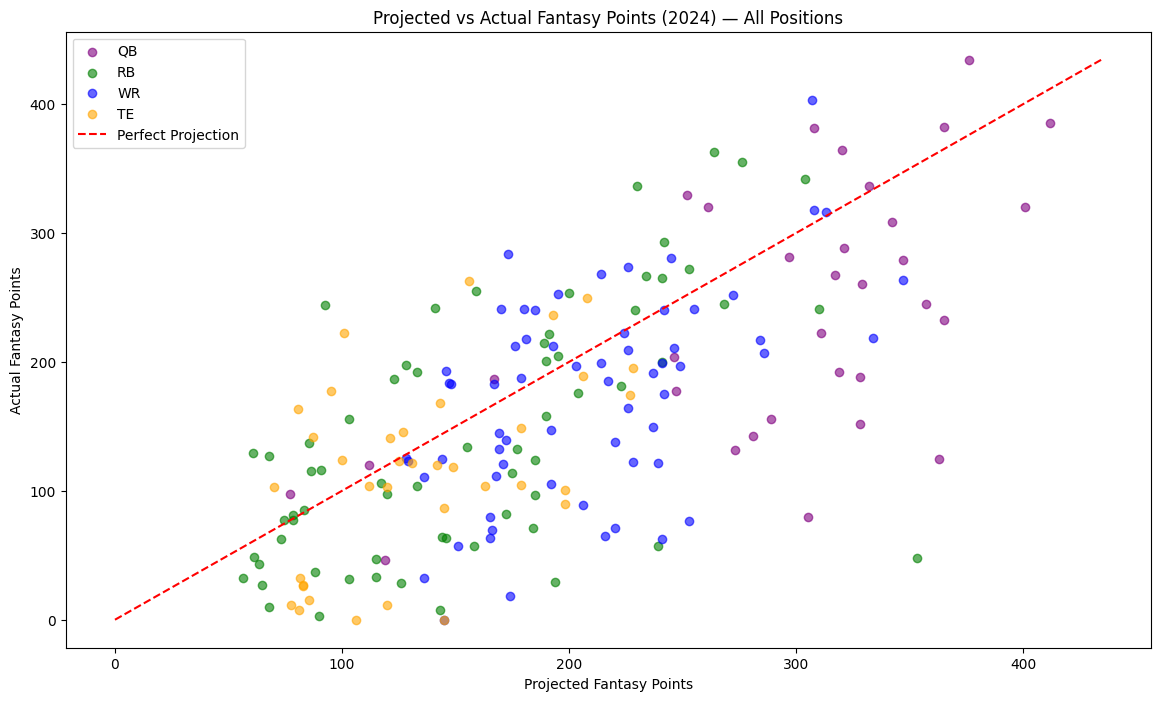

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: add position label to each merged df
merged_qb['position'] = 'QB'
merged_rb['position'] = 'RB'
merged_wr['position'] = 'WR'
merged_te['position'] = 'TE'

# Step 2: combine into one dataframe
merged_all = pd.concat([merged_qb, merged_rb, merged_wr, merged_te], ignore_index=True)

# Step 3: plot
plt.figure(figsize=(14,8))

for pos, color in zip(['QB','RB','WR','TE'], ['purple','green','blue','orange']):
    df_pos = merged_all[merged_all['position'] == pos]
    plt.scatter(df_pos['points'], df_pos['FPTS'], alpha=0.6, label=pos, color=color)

# Diagonal reference line
min_val = min(merged_all['points'].min(), merged_all['FPTS'].min())
max_val = max(merged_all['points'].max(), merged_all['FPTS'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Perfect Projection")

plt.xlabel("Projected Fantasy Points")
plt.ylabel("Actual Fantasy Points")
plt.title(f"Projected vs Actual Fantasy Points ({YEAR}) — All Positions")
plt.legend()
plt.show()